- read and display image
- change a color image into a grey scale image
- create a keras layer
- print convolved image
- print weight matrix
- See the effect of different activation function

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import os
import PIL
import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

Original:


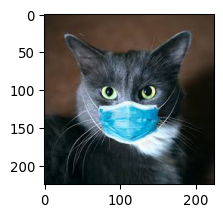

(225, 225, 3)


In [61]:
import imageio
import imgaug as ia
%matplotlib inline

image = imageio.imread("Cat.jpg")

print("Original:")
ia.imshow(image)

print(image.shape)

In [62]:
from PIL import Image
img = Image.open('Cat.jpg').convert('L')
img.save('grey_Cat.jpg')
image = imageio.imread("grey_Cat.jpg")
print(image.shape)

(225, 225)


In [20]:
# Reshaping GRAY image to get following: (batch size, rows, columns, channels)
image_input_GRAY = image.reshape(1, image.shape[0], image.shape[1], 1).astype(np.float32)
print('Shape of x_input_GRAY is :', image_input_GRAY.shape)
image_input_GRAY.shape[1:]

Shape of x_input_GRAY is : (1, 225, 225, 1)


(225, 225, 1)

In [63]:
# Sobel filter to detect vertical changes on image
f1 = np.array([[1, 0, -1],
               [2, 0, -2],
               [1, 0, -1]])
layer = tf.keras.layers.Conv2D(filters=1,
                               kernel_size=(3, 3),
                               strides=1,
                               padding='same',
                               activation='relu',
                               input_shape= image_input_GRAY.shape[1:],
                               use_bias=False,
                               kernel_initializer=tf.keras.initializers.constant(f1))


# Check point
print('Tensorflow Conv2D layer is successfully initialized ' + '\U0001F44D')

Tensorflow Conv2D layer is successfully initialized 👍


In [64]:
output = layer(image_input_GRAY)
# Check points
print('Convolution is successfully applied ' + '\U0001F44C')
print('\n' + 'Shape of the output is :', output.shape)
print('\n' + 'Data type of the output is :', type(output))

Convolution is successfully applied 👌

Shape of the output is : (1, 225, 225, 1)

Data type of the output is : <class 'tensorflow.python.framework.ops.EagerTensor'>


In [65]:
# from the output, take just the feature map
# Converting output Tensor into Numpy array
output = np.array(output[0, :, :, 0])

# Check points
print('Shape of the output is :', output.shape)
print('\n' + 'Data type of the output is :', type(output))
print(output)

Shape of the output is : (225, 225)

Data type of the output is : <class 'numpy.ndarray'>
[[  0.   0.   0. ...   0.   3. 168.]
 [  0.   0.   0. ...   0.   4. 224.]
 [  0.   0.   0. ...   0.   4. 225.]
 ...
 [  0.   0.   1. ...   0.   0. 133.]
 [  0.   6.   6. ...   0.   0. 134.]
 [  0.   9.   9. ...   0.   0.  97.]]


#### Visualize the output image

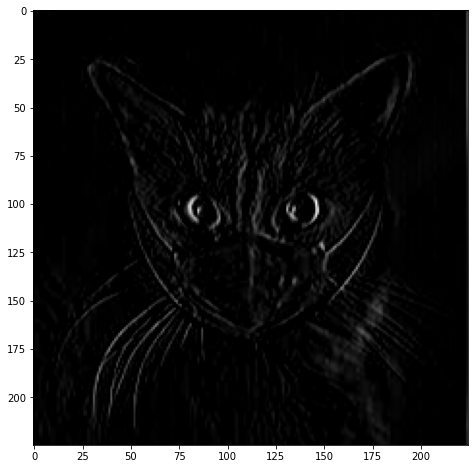

In [32]:
%matplotlib inline  
# Setting default size of the plot
plt.rcParams['figure.figsize'] = (8, 8)

# Creating a plot with convolved image
plt.imshow(output, cmap=plt.get_cmap('gray'))
plt.show()

####  Get the weight Matrix

In [42]:
# Getting type of the container that holds weights
print('Datatype of the container that holds weights is :', type(layer.get_weights()))  # list
print()

# Showing shape of the weights
print(layer.get_weights()[0].shape)  # (3, 3, 1, 1)
print()

# Showing one channel of the weights themselves
print(layer.get_weights()[0][:, :, 0, 0])

Datatype of the container that holds weights is : <class 'list'>

(3, 3, 1, 1)

[[ 1.  0. -1.]
 [ 2.  0. -2.]
 [ 1.  0. -1.]]


In [43]:
f = np.array([[0, 1, 0], 
               [1, -4, 1], 
               [0, 1, 0]])
print(f.shape)


# Reshaping filter to get following: (height, width, channels, filters)
f_new = f.reshape(3, 3, 1, 1)

# Showing shape of the updated filter
print(f_new.shape)

(3, 3)
(3, 3, 1, 1)


In [44]:
# Setting up new weights in the layers
layer.set_weights([f_new])


# Showing one channel of the updated weights
print(layer.get_weights()[0][:, :, 0, 0])

[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]


Shape of the output is : (225, 225)

Data type of the output is : <class 'numpy.ndarray'>


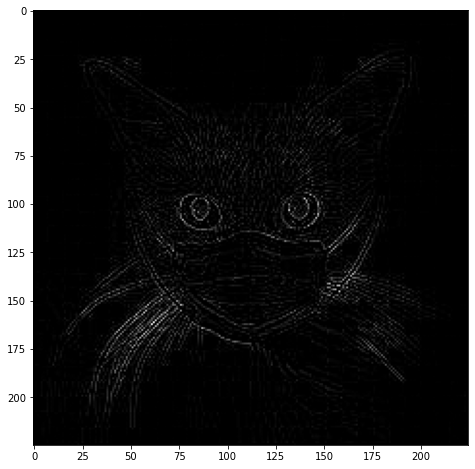

In [45]:
## Convolve the image with new weights and print the result
output = layer(image_input_GRAY)

# take only feature map
output = np.array(output[0, :, :, 0])

# Check points
print('Shape of the output is :', output.shape)
print('\n' + 'Data type of the output is :', type(output))

# See output
%matplotlib inline  
# Setting default size of the plot
plt.rcParams['figure.figsize'] = (8, 8)

# Creating a plot with convolved image
plt.imshow(output, cmap=plt.get_cmap('gray'))
plt.show()

### Changing the Activation function

In [52]:
# Initializing Conv2D layer for GRAY input
layer_1 = tf.keras.layers.Conv2D(filters=1,
                               kernel_size=(3, 3),
                               strides=1,
                               padding='same',
                               activation='sigmoid',
                               input_shape=image_input_GRAY.shape[1:],
                               use_bias=False,
                               kernel_initializer=tf.keras.initializers.constant(f))


# Check point
print('Tensorflow Conv2D layer is successfully initialized')

Tensorflow Conv2D layer is successfully initialized


Shape of the output is : (225, 225)

Data type of the output is : <class 'numpy.ndarray'>


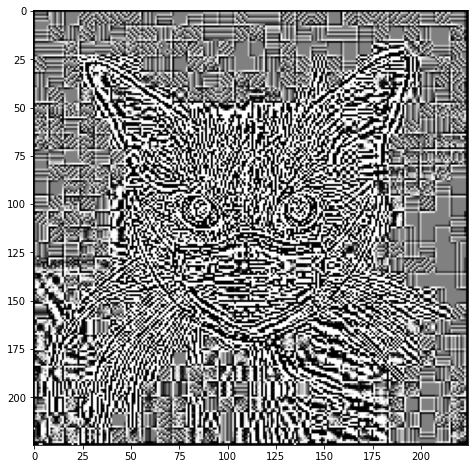

In [53]:
## Convolve the image with new weights and print the result
output = layer_1(image_input_GRAY)

# take only feature map
output = np.array(output[0, :, :, 0])

# Check points
print('Shape of the output is :', output.shape)
print('\n' + 'Data type of the output is :', type(output))

# See output
%matplotlib inline  
# Setting default size of the plot
plt.rcParams['figure.figsize'] = (8, 8)

# Creating a plot with convolved image
plt.imshow(output, cmap=plt.get_cmap('gray'))
plt.show()

Tensorflow Conv2D layer is successfully initialized
Shape of the output is : (225, 225)

Data type of the output is : <class 'numpy.ndarray'>


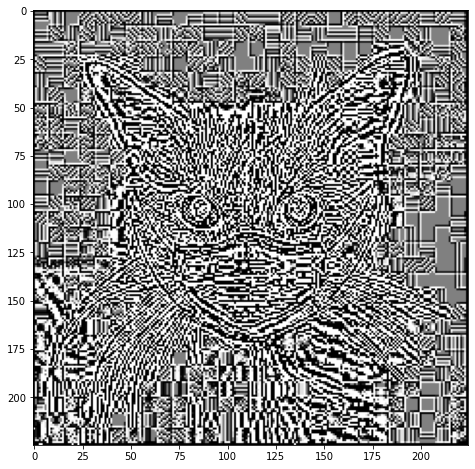

In [56]:
# Effect of tanH activation function
layer_2 = tf.keras.layers.Conv2D(filters=1,
                               kernel_size=(3, 3),
                               strides=1,
                               padding='same',
                               activation='tanh',
                               input_shape=image_input_GRAY.shape[1:],
                               use_bias=False,
                               kernel_initializer=tf.keras.initializers.constant(f))


# Check point
print('Tensorflow Conv2D layer is successfully initialized')
## Convolve the image with new weights and print the result
output = layer_2(image_input_GRAY)

# take only feature map
output = np.array(output[0, :, :, 0])

# Check points
print('Shape of the output is :', output.shape)
print('\n' + 'Data type of the output is :', type(output))

# See output
%matplotlib inline  
# Setting default size of the plot
plt.rcParams['figure.figsize'] = (8, 8)

# Creating a plot with convolved image
plt.imshow(output, cmap=plt.get_cmap('gray'))
plt.show()

Tensorflow Conv2D layer is successfully initialized
Shape of the output is : (225, 225)

Data type of the output is : <class 'numpy.ndarray'>


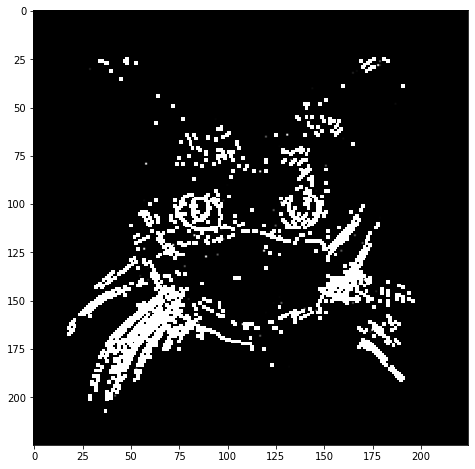

In [59]:
# Effect of tanH activation function
layer_2 = tf.keras.layers.Conv2D(filters=1,
                               kernel_size=(3, 3),
                               strides=1,
                               padding='same',
                               activation='exponential',
                               input_shape=image_input_GRAY.shape[1:],
                               use_bias=True,
                               kernel_initializer=tf.keras.initializers.constant(f))


# Check point
print('Tensorflow Conv2D layer is successfully initialized')
## Convolve the image with new weights and print the result
output = layer_2(image_input_GRAY)

# take only feature map
output = np.array(output[0, :, :, 0])

# Check points
print('Shape of the output is :', output.shape)
print('\n' + 'Data type of the output is :', type(output))

# See output
%matplotlib inline  
# Setting default size of the plot
plt.rcParams['figure.figsize'] = (8, 8)

# Creating a plot with convolved image
plt.imshow(output, cmap=plt.get_cmap('gray'))
plt.show()